In [108]:
import pandas as pd
import nltk

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df = pd.read_csv('/content/drive/MyDrive/datasets/SMSSpamCollection',sep='\t',names=['label','msg'])

In [110]:
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [113]:
ps = PorterStemmer()

In [114]:
corpus = []

In [115]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['msg'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [117]:
corpus[1:30]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 '

In [98]:
len(df)

5572

In [132]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

In [133]:
X.shape

(5572, 5000)

In [130]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
y = pd.get_dummies(df['label'])

In [144]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [145]:
y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [146]:
len(y)

5572

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [149]:
from sklearn.naive_bayes import MultinomialNB


In [150]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [152]:
y_pred = nb.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [154]:
print('pred',y_pred[1:50])
print('test',y_test[1:50])

pred [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1]
test [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1]


In [156]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9847533632286996


In [158]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9440993788819876
Recall: 0.95


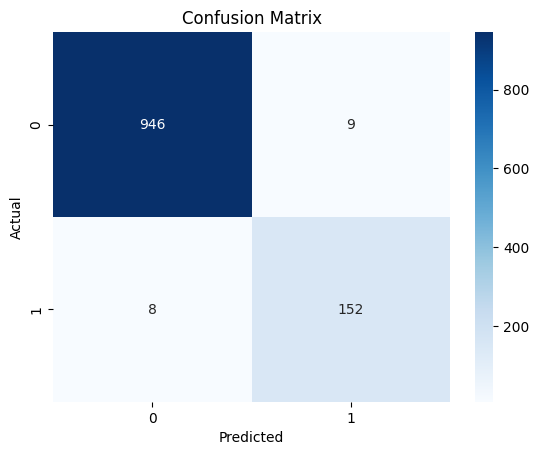

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()